# <span style="color:#2595bc"><i>K</i>-Armed Bandit Problem</span>
## <span style="color:#2595bc"> Basics and Definitions </span>

Imagine you have a slot machine with $K$-arms or levers. Whenever you pull down one lever, you are given a reward based upon which lever you pulled. Each lever arm has a reward associated with it. When the probabilistic distribution of rewards associated with a lever do not change with time, ie they are fixed, it's <span style="color:#f31818"><i>stationary problem</i></span>. When the rewards change with use of levers, it's a <span style="color:#f31818"><i>non-stationary</i></span> one. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or <i>time steps</i>

Each of the $k$ actions have an expected or mean reward that we expect to get when we select that action. We denote the action selected on time step $t$ as $A_{t}$ and the corresponding reward as $R_{t}$. The <b><span style="color:#f31818">action value</span></b> then of an arbitrary action $a$, denoted $q_{*} (a)$, is the expected reward given that a is selected:<br>
    $$q_{*} (a) = \mathbb{E}[R_{t}|A_{t}=a]$$
 
Simply put, we <b>estimate</b> how much reward we ought to get when we choose action $a$ based on our previous experiences when we chose the same action.If you knew the value of each action, then it would be trivial to solve the k-armed bandit problem: you would always select the action with highest value in order to maximize the objective. We assume that you do not know the action values with certainty, although we may make estimates as we play the game. Based on our ever-evolving estimates we will choose our option that is most likely to give us the most reward.

## <span style="color:#2595bc"> Explorations VS Exploitation</span>

If you maintain estimates of the action values, then at any time step there is at
least one action whose estimated value is greatest. We call these the <b><i>greedy</i></b> actions.
When you select one of these actions, we say that you are <b><i><span style="color:#f31818">exploiting</i></b></span> your current
knowledge of the values of the actions. If instead you select one of the <b><i>nongreedy</i></b> actions, then we say you are <b><i><span style="color:#f31818">exploring</span></i></b>, because this enables you to improve your
estimate of the nongreedy action’s value. Exploitation is the right thing to do to
maximize the expected reward on the one step, but exploration may produce the
greater total reward in the long run.

Reward is lower in the short run, during exploration, but higher in the long run because after you have discovered the better actions, you can exploit them many times. Because it is not possible both to explore and to exploit with any single action selection, one often refers to the “conflict” between exploration and exploitation.

## <span style="color:#2595bc">Estimating Action Values</span>

The simplest and intuitive way of estimating Action Value at step $t$ for a particular action $a$ is to take the <i>mean</i> of the rewards we got in the past whenever we chose action $a$.<br>
$$Q_{t}(a) = \frac{\text{sum of rewards when $a$ taken prior to $t$}}{\text{number of times $a$ taken prior to $t$}} = \frac{\sum_{i=1}^{t-1}R_{i}\cdot \textbf{1}_{\text A_{i}=a}} {\sum_{i=1}^{t-1}\textbf{1}_{\text A_{i}=a}}$$

where $\textbf 1_{condition}$ denotes is 1 if $condition$ is true and 0 if it is not. Simply put, the above expression just estimates the average returns each time we chose action $a$ , prior to state $t$

If the denominator is zero, then we instead define $Q_{t}(a)$ as some default value,
such as $Q_{1}(a) = 0$

## <span style="color:#2595bc"> Which action to take( or which lever to pull)? </span>


The simplest action selection rule is to select the action (or one of the actions)
with <span style="color:#f31818">highest estimated action value</span>, that is, to select at step $t$ one of the greedy
actions, $A_{∗}^t$ , for which $Q_{t}(A_{t}^*) = max_{a} Q_{t}(a)$. 

All that the above equation says is that, at a given state $t$, the action $a$ will be our preferred choice i.e $a$ will be $A_{t}^*$ if the action value associated with $a$ , which is $Q_{t}(a)$ is the maximum among all action values for all possibilites of $a$.


The above <i><span style="color:#f31818">greedy action selection</span></i> method can be also be written mathematically as :- 
$$A_{t} = argmax_a Q_t(a)$$
where $argmax_a$ denotes the value of $a$ at which the expression that follows is maximized
(with ties broken arbitrarily)


## <span style="color:#2595bc">Okay. But what about exploration?</span>

Greedy action selection always exploits current knowledge to maximize immediate reward; it spends no time at all sampling apparently
inferior actions to see if they might really be better. A simple alternative is to
behave greedily most of the time, but every once in a while, say with small probability
$\varepsilon$, instead to select randomly from amongst all the actions with equal probability
independently of the action-value estimates.We call methods using this near-greedy
action selection rule <i><span style="color:#f31818">$\varepsilon-greedy$ methods</i></span>. 





In [1]:
#Import dependencies
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


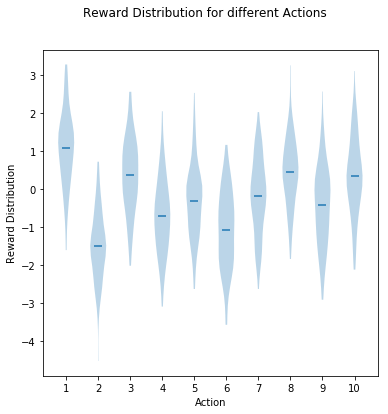

In [2]:
# An example bandit problem 

import random
import numpy as np
import matplotlib.pyplot as plt

def example_bandit_rewards_plot():
    # fake data
    fs = 10  # fontsize
    pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    data = [np.random.normal(0, std, size=100) for std in pos]

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    optimal_action_values = np.random.normal(0, 1, size=10)

    rewards = [np.random.normal(optimal_action_value,1,size=100) for optimal_action_value in optimal_action_values]

    axes.violinplot(rewards, pos, points=20, 
                          showmeans=True, showextrema=False, showmedians=False)
    #axes.set_title('Reward Distribution for different Actions', fontsize=fs)


    axes.set_xlabel("Action")
    axes.set_xticks(pos)
    axes.set_ylabel("Reward Distribution")
    fig.suptitle("Reward Distribution for different Actions")
    #fig.subplots_adjust(hspace=0.4)
    plt.show()

example_bandit_rewards_plot()


Average Reward : Epsilon : 0.1 	 2.1071979647251085
Average Reward : Epsilon : 0 	 1.0368637208343439


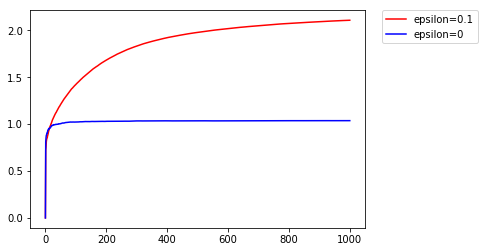

In [8]:
#Multi Armed bandit 
list_optimal = [0.5,0.7,0.9,1.1,2.4,0.1,0.9,0.1,0.3,0.7]

def greedy_bandit(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1,):
    no_of_actions = arms
    #optimal_action_values = np.random.normal(mean_optimal, std_dev_optimal, size=no_of_actions)
    optimal_action_values = list_optimal
    expect = [init_expectation]*no_of_actions
    act_occur = [0]*no_of_actions

    def get_maxvalue_index(list_):
        #Get list of indexes which contain maximum value in a list
        indexes_of_max_values = np.argwhere(list_ == np.amax(list_)).flatten().tolist()
        #return an index randomly
        return random.choice(indexes_of_max_values)

    avg_rward_list = [0]
    avg_rward_value = 0


    counter = 0
    #print (optimal_action_values)
   
    for t in range(iterations):

        counter += 1
        print
        if random.random()<epsilon:
            act_index = random.randint(0,no_of_actions-1)
            #print ("*")
        else:
            act_index = (get_maxvalue_index(expect))
        act_occur[act_index]+=1
        rward_t = np.random.normal(optimal_action_values[act_index],std_dev_reward)

        expect[act_index] = (((expect[act_index]*(act_occur[act_index]-1))+rward_t)/(act_occur[act_index]))

        avg_rward_value = ((avg_rward_value*(counter-1))+rward_t)/(counter)
        avg_rward_list.append(avg_rward_value)
        #print  (act_index)
    #plt.plot(avg_rward_list,color=colr)
    #print ("Average Reward : Greedy : \t",avg_rward_value)
    return avg_rward_list,avg_rward_value


def greedy_experiment(arms=10,mean_optimal=0,std_dev_optimal=1,std_dev_reward=1,init_expectation = 0,iterations=1000,epsilon=0.1,no_of_exp = 500):
    rward_list = [0]
    rward_value = 0
    for x in range(no_of_exp):
        avg_lists, avg_values = greedy_bandit(arms,mean_optimal,std_dev_optimal,std_dev_reward,init_expectation,iterations,epsilon)
        if x == 0:
            rward_list = avg_lists
            rward_value = avg_values
        else:
            rward_list = np.add(np.dot(x,rward_list),avg_lists)/(x+1)
            rward_value = ((x*rward_value)+avg_values)/(x+1)
  
    print ("Average Reward : Epsilon :",epsilon, "\t",rward_value)
    return (rward_list)
#a = plot_greedy(epsilon=0.1)
#b = plot_greedy(epsilon=0.5)
plt.plot(greedy_experiment(epsilon=0.1),color='r', label="epsilon=0.1")
plt.plot(greedy_experiment(epsilon=0),color='b',label="epsilon=0")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## <span style="color:#2595bc">Incremental Implementation</span>
Let $R_i$ denote the reward after $i$th selection of a specific action $a$. Let $Q_n$ denote the estimate of it's action value after $a$ has been selected $n-1$ times, then we know that
$$Q_n = \dfrac{ R_1+R_2+.+.+R_{n-1}}{n-1}$$

There is some math involved in the subsequent step. If you are not able to get it, fret not. Jump down the equations where I have explained the result.
So, the expression for $Q_n$ can be further simplified in a way that we don't need to store all the $R_{i}$'s to compute the sum. Given $Q_n$  and the $n$th reward, $R_n$, the new average of all $n$ rewards can be computed by - 
$$\begin{equation*}
Q_{n+1} = \dfrac{1}{n}\sum\limits_{i=1}^n R_i
\end{equation*}
$$
$$\begin{equation*}
\qquad \qquad \qquad =\dfrac{1}{n}\left( R_n + \sum\limits_{i=1}^{n-1} R_i\right)
\end{equation*}$$
$$\begin{equation*}
\qquad \qquad \qquad \qquad \qquad \ \  =\dfrac{1}{n}\Biggl( R_n + (n-1)\dfrac{1}{n-1}\sum\limits_{i=1}^{n-1} R_i\Biggr)
\end{equation*}$$
$$\begin{equation*}
\qquad \qquad \qquad \ \ \ \ =\dfrac{1}{n}\Biggl( R_n + (n-1) Q_{n}\Biggr)
\end{equation*}$$
$$\begin{equation*}
\qquad \qquad \qquad \ \ \ \ =\dfrac{1}{n}\Biggl( R_n + nQ_{n} - Q_n\Biggr)
\end{equation*}$$
$$\begin{equation*}
\qquad \qquad \qquad \ \ =Q_n + \dfrac{1}{n}\Biggl[R_n - Q_n\Biggr]
\end{equation*}$$

This can be further written as 

$$\begin{equation*}
Q_{n+1} = Q_{n} + \alpha\Biggl[R_n - Q_n\Biggr]
\end{equation*}$$

The <span style="color:#f31818"><i>$\alpha$</i></span> here is known as <span style="color:#f31818"><i>step size</i></span>. Note that as far we have studies, $\alpha$ changes with time and is not constant. The equation can also be expressed as - 

$$\begin{equation*}
NewEstimate = OldEstimate + StepSize \Biggl[Target − OldEstimate\Biggr]
\end{equation*}$$

The expression $[Target − OldEstimate]$ is an <span style="color:#f31818"><i>error</i></span> in the estimate. At each step we try to predict the $Action Values$ accurately so that we can make a proper decision. But the <i>error</i> reflects how much our prediction$(Q_n)$ differs from the actual rewards we obtain. We need to reduce this error. It is by modifying our prediction by taking a step toward the “Target.” The target is presumed to indicate a desirable direction in which to move. The actual reward $R$ is our desired output as our prediction ideally should give this output. Therefore we change our $OldEstimate$ by a value $[Target - OldEstimate]$ which is nothing but the error.

## <span style="color:#2595bc">Non-Stationary Problem</span>

The averaging methods discussed so far are appropriate in a stationary environment,
but not if the bandit is changing over time. In such cases
it makes sense to weight recent rewards more heavily than long-past ones. One of
the most popular ways of doing this is to use <b>constant step-size</b>.

So, we can take a constant $\alpha$ and modify our update rule as 
$$\begin{equation*}
Q_{n+1} = Q_{n} + \alpha\Biggl[R_n - Q_n\Biggr]
\end{equation*}$$

where the step-size $\alpha \in (0,1]$ i.e $\alpha$ can vary from 0 to 1(excluding 0 and including 1)

This results in $Q_{n+1}$ taking a very interesting form. $Q_{n+1}$ becomes a <b><i>weighted average</i></b> of past rewards and the initial estimate $Q_1$.
$$\begin{equation*}
Q_{n+1} = Q_n + \alpha[R_n - Q_n]
\end{equation*}
$$

<span style="color:#f31818">$$\begin{equation*}
\qquad = \alpha R_n + (1-\alpha)Q_n
\end{equation*}
$$</span>

This intermediate step gives very vital insight to what we are doing. Initially when we were simply taking the average of all the returns we got, we gave <b>equal weightage</b> to each return we got for computing the expectation/prediction, disregarding at which time step we got the return


$$\begin{equation*}
= \alpha R_n + (1-\alpha)[\alpha R_{n-1} + (1-\alpha)
\end{equation*}
$$
